<a href="https://colab.research.google.com/github/subhra01/Python_Project_DS/blob/main/Employee_turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: TECHNOHACKS EDUTECH.
(Internship Program 2023, Batch-7)

Author: Subhradyuti Jana (Data science intern)

**Problem Statement:**  **Employee turnover prediction**- Use a dataset of employee information and
build a model that can predict which employees are most likely to leave the company.

In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head()
dataset.shape
dataset.columns
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
dataset.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
dataset.duplicated(keep="first").sum()

0

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### **Exploratory Data Analysis**

In [7]:
dataset["HourlyRate"].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38])

In [8]:
bins = len(dataset["HourlyRate"].unique())
bins

71

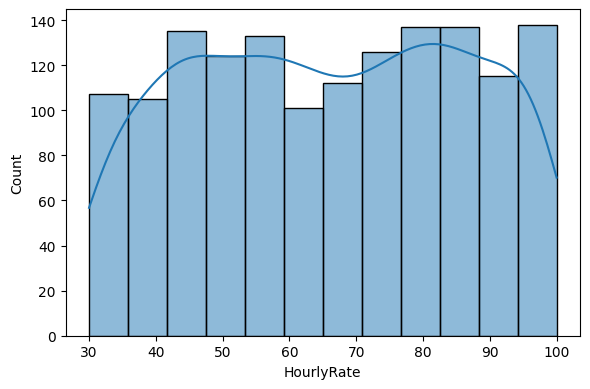

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(data = dataset, x = dataset["HourlyRate"], kde=True)
plt.tight_layout()
plt.show()

In [10]:
dataset["JobInvolvement"].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

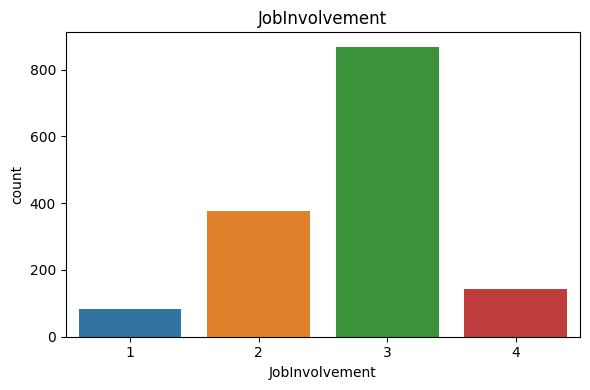

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x="JobInvolvement")
plt.title("JobInvolvement")
plt.tight_layout()
plt.show()

In [12]:
dataset["YearsSinceLastPromotion"].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [13]:
labels = dataset["YearsSinceLastPromotion"].value_counts().index.tolist()
labels

[0, 1, 2, 7, 4, 3, 5, 6, 11, 8, 9, 15, 13, 12, 14, 10]

In [14]:
labels = ["Promoted" if i >= 1 else "Not Promoted" for i in labels]
labels

['Not Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted',
 'Promoted']

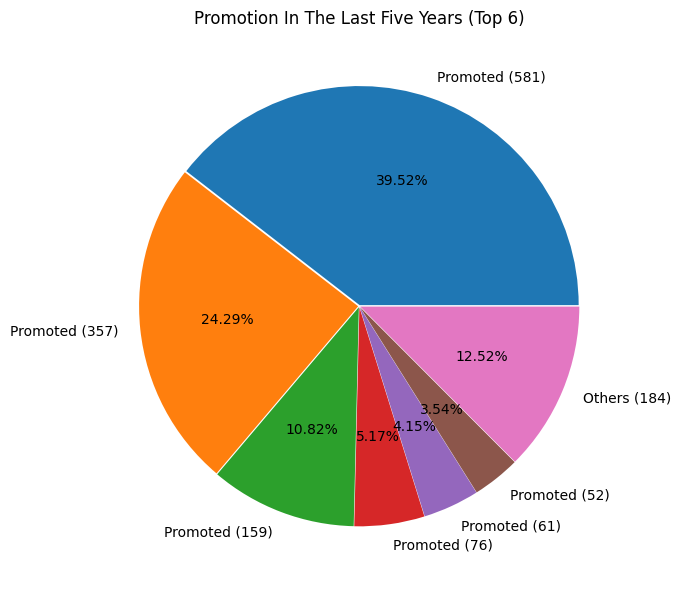

In [19]:

# Calculate value counts of the "YearsSinceLastPromotion" column
value_counts = dataset["YearsSinceLastPromotion"].value_counts()

# Set the number of top slices to display
top_n = 6

# Get the top N slices and their labels
top_slices = value_counts.nlargest(top_n)
top_labels = ["{} ({})".format("Promoted" if i >= 1 else "Not Promoted", i) for i in top_slices]

# Calculate the sum of the remaining slices to group them as "Others"
remaining_sum = value_counts.nsmallest(len(value_counts) - top_n).sum()

# Combine the remaining slices into "Others" category
top_slices["Others"] = remaining_sum
top_labels.append("Others ({})".format(remaining_sum))

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(x=top_slices, labels=top_labels, autopct="%1.2f%%", explode=[0.005] * len(top_labels))
plt.title("Promotion In The Last Five Years (Top {})".format(top_n))
plt.tight_layout()
plt.show()

In [20]:
dataset["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [21]:
labels = dataset["WorkLifeBalance"].value_counts().index.tolist()
labels

[3, 2, 4, 1]

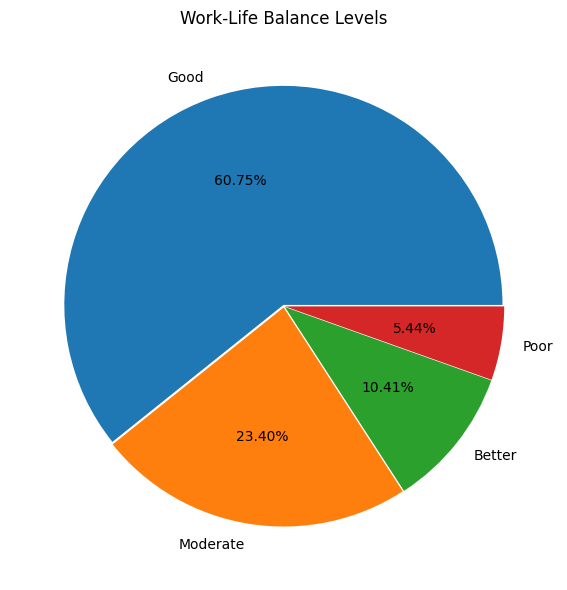

In [22]:
labels = [3, 2, 4, 1]
counts = dataset["WorkLifeBalance"].value_counts().tolist()

# Labels for the pie chart based on the work-life balance levels
work_life_balance_labels = ["Good", "Moderate", "Better", "Poor"]

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=work_life_balance_labels, autopct="%1.2f%%", explode=[0.006] * len(labels))
plt.title("Work-Life Balance Levels")
plt.tight_layout()
plt.show()

In [23]:
dataset["TotalWorkingYears"].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

In [24]:
labels = dataset["TotalWorkingYears"].value_counts().index.tolist()
labels

[10,
 6,
 8,
 9,
 5,
 7,
 1,
 4,
 12,
 3,
 15,
 16,
 11,
 13,
 21,
 17,
 2,
 14,
 20,
 18,
 19,
 23,
 22,
 24,
 25,
 28,
 26,
 0,
 29,
 31,
 32,
 30,
 33,
 27,
 36,
 34,
 37,
 35,
 40,
 38]

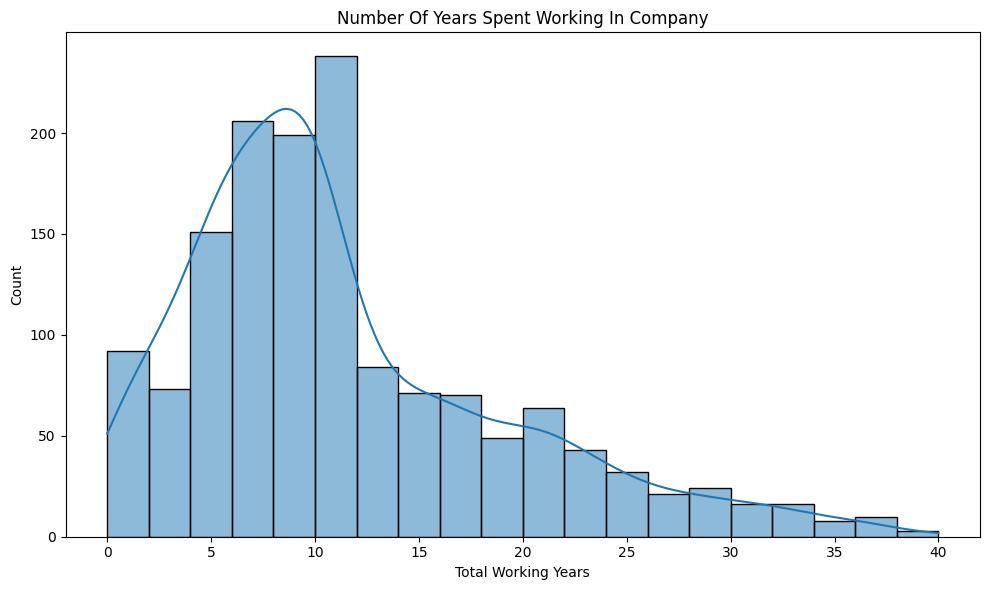

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x="TotalWorkingYears", bins=20, kde=True)
plt.title("Number Of Years Spent Working In Company")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [26]:
dataset["TotalWorkingYears"].mean()

11.279591836734694

In [27]:
dataset["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [28]:
dataset["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

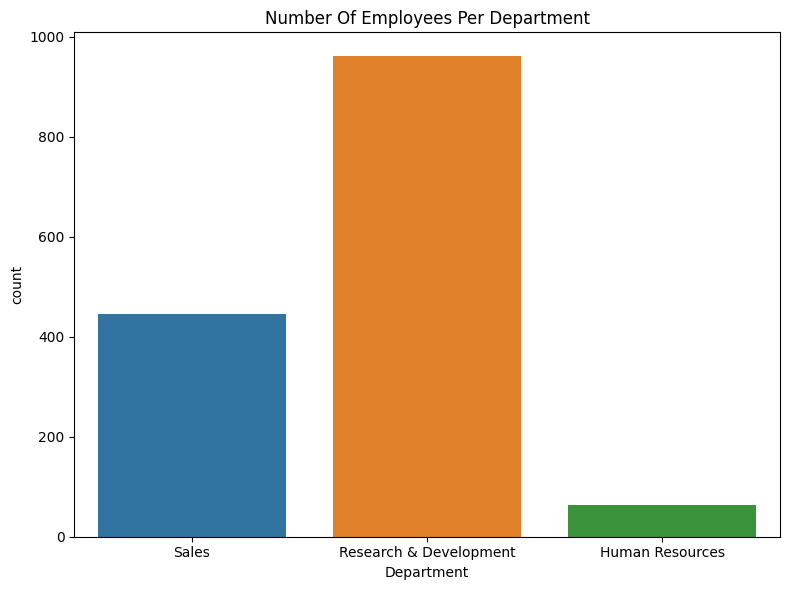

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x = "Department", data=dataset)
plt.title("Number Of Employees Per Department")
plt.tight_layout()
plt.show()

In [30]:
dataset["MonthlyIncome"].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404])

In [31]:
dataset["MonthlyIncome"].value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

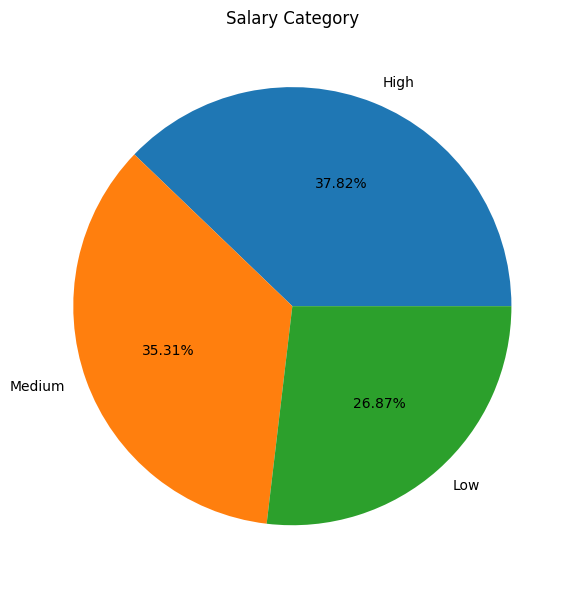

In [35]:
salary_bins = [0, 3000, 6000, float('inf')]
salary_labels = ['Low', 'Medium', 'High']
dataset['SalaryCategory'] = pd.cut(dataset['MonthlyIncome'], bins=salary_bins, labels=salary_labels, right=False)
category_counts = dataset['SalaryCategory'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

In [36]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SalaryCategory'],
      dtype='object')

### Data PreProcessing

In [37]:
categorical_cols = ["Department", "MonthlyIncome"]
encoded_cols = pd.get_dummies(dataset[categorical_cols], prefix="cat")

In [38]:
encoded_cols

,MonthlyIncome,cat_Human Resources,cat_Research & Development,cat_Sales
0,5993,0,0,1
1,5130,0,1,0
2,2090,0,1,0
3,2909,0,1,0
4,3468,0,1,0
...,...,...,...,...
1465,2571,0,1,0
1466,9991,0,1,0
1467,6142,0,1,0
1468,5390,0,0,1


In [39]:
dataset = dataset.join(encoded_cols, lsuffix='', rsuffix='_encoded')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryCategory,MonthlyIncome_encoded,cat_Human Resources,cat_Research & Development,cat_Sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,6,4,0,5,Medium,5993,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,10,7,1,7,Medium,5130,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,0,0,0,0,Low,2090,0,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,8,7,3,0,Low,2909,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,2,2,2,2,Medium,3468,0,1,0


### Split Data Into Train and Test

In [40]:
attrition_counts = dataset["Attrition"].value_counts()
print(attrition_counts)

No     1233
Yes     237
Name: Attrition, dtype: int64


In [41]:
X = dataset.drop("Attrition", axis=1)
y = dataset["Attrition"]
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryCategory,MonthlyIncome_encoded,cat_Human Resources,cat_Research & Development,cat_Sales
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,6,4,0,5,Medium,5993,0,0,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,3,10,7,1,7,Medium,5130,0,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,3,0,0,0,0,Low,2090,0,1,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,8,7,3,0,Low,2909,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,3,2,2,2,2,Medium,3468,0,1,0


In [42]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape
X_test.shape

(294, 39)

### Train Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
logReg = LogisticRegression(max_iter=2000)

In [ ]:
re

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocessing
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
data_encoded = pd.get_dummies(dataset, drop_first=True)

# Select features and target
X = data_encoded.drop("Attrition_Yes", axis=1)  # Dropping the target variable
y = data_encoded["Attrition_Yes"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model
log_reg = LogisticRegression(solver='saga', max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294

Confusion Matrix:
 [[241  14]
 [ 21  18]]


In [56]:
logReg = LogisticRegression(max_iter=5000, solver='lbfgs', class_weight='balanced')

logReg = LogisticRegression(max_iter=5000, solver='liblinear')

logReg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [57]:
logReg_predictions = logReg.predict(X_test)

accuracy_score(y_test, logReg_predictions)

0.8979591836734694

In [58]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.71      0.38      0.50        39

    accuracy                           0.90       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.89      0.90      0.88       294



In [59]:
cm = confusion_matrix(y_test, logReg_predictions)
cm

array([[249,   6],
       [ 24,  15]])

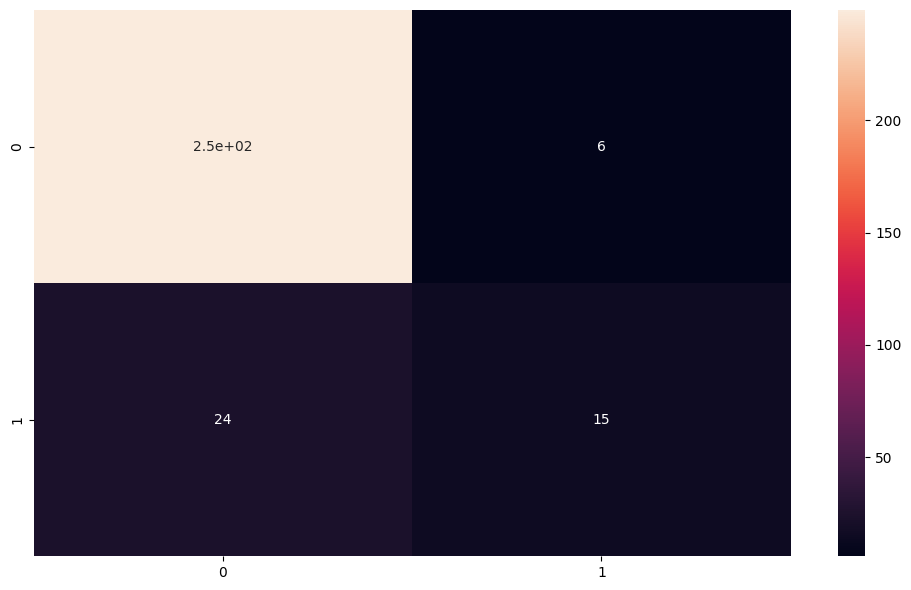

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

ranForest = RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
ranForest_predictions = ranForest.predict(X_test)
accuracy_score(y_test, ranForest_predictions)

0.8707482993197279

In [63]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



In [64]:
cm = confusion_matrix(y_test, ranForest_predictions)
cm

array([[252,   3],
       [ 35,   4]])

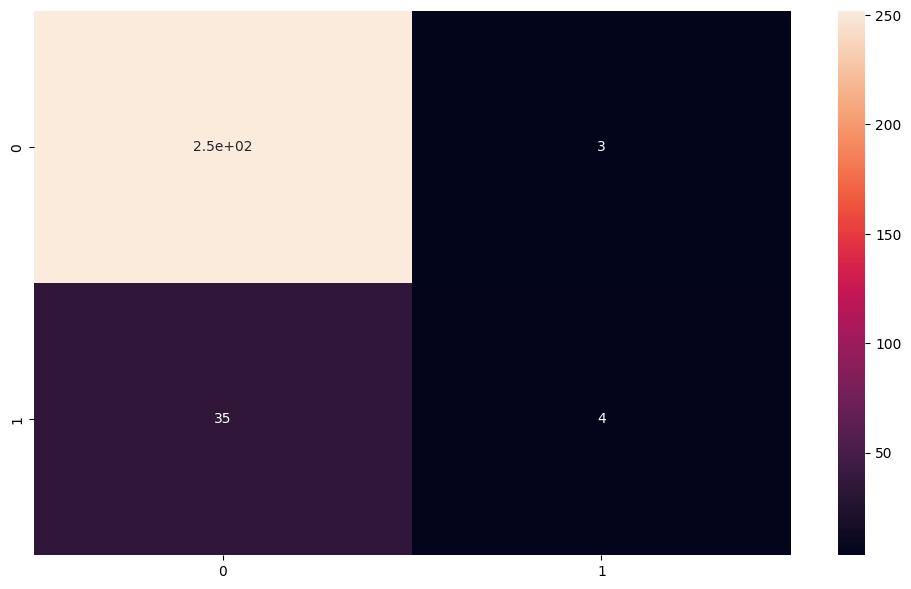

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

### Hyperparameter Tunning

In [66]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [67]:
kfold = StratifiedKFold(n_splits=5)

In [69]:
clf = GridSearchCV(ranForest, parameter, scoring="accuracy", n_jobs=2, cv=kfold)

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [70]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 '

In [71]:
clf.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [72]:
clf.best_score_

0.8554417598269023